In [7]:
import numpy as np
import scipy.stats as st
import math 
import matplotlib.pyplot as plt
import seaborn as sns

### Integrate

In [15]:
def prob_1(x):
    return x ** 2

def prob_2(x):
    return x * (2 - x)

from scipy.integrate import quad

q1 = quad(prob_1, 0, 1)
q2 = quad(prob_2, 1, 2)

integ1 = q1[0] - q1[1]
integ2 = q2[0] - q2[1]

print(round(integ1 + integ2, 5))

1.0


### Bernoulli

### $P(x) = p$

In [27]:
# Generate Data with Python
def prob(p):
    return p

def generate(size, p):
    data = []
    for _ in range(size):
        prob = np.random.rand()
        if prob < p:
            data.append(1)
        else:
            data.append(0)
    return data

data = generate(10000, 0.6)
data.count(1), data.count(0)

(5979, 4021)

### Binomial

### $P(x) = {n \choose k} \times p^k(1-p)^{n-k}$

In [31]:
# PMF in Python
def comb(n, k):
    return math.factorial(n) / math.factorial(k) / math.factorial(n-k)

def p_binom(p, n, k):
    return comb(n, k) * p**k * (1-p)**(n-k)

p_binom(0.5, 10, 3)

0.1171875

In [32]:
# PMF in Stats
st.binom(10, 0.5).pmf(3)

0.11718750000000014

In [34]:
# Generate Data with Stats
data = st.binom(10, 0.5).rvs(size=10000)

<Figure size 480x320 with 0 Axes>

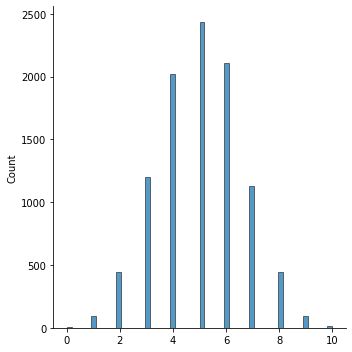

In [35]:
# Plot Distribution
plt.figure(dpi=80)

sns.displot(data)

plt.show()

### Poisson

### $P(k) = e^{-\lambda} \times \frac{\lambda^k}{k!}$

In [38]:
# PMF in Python
def p_pois(lam, k):
    return math.exp(-lam) * lam**k / math.factorial(k)

p_pois(10, 5)

0.03783327480207071

In [39]:
# PMF in Stats
st.poisson.pmf(5, 10)
st.poisson(10).pmf(5)

0.03783327480207079

In [40]:
# CDF in Python
def c_pois(lam, bound):
    total = 0
    for i in range(1, bound+1):
        total += p_pois(lam, i)
    return total

c_pois(10, 3)

0.010290650746163234

In [41]:
# CDF in Stats
st.poisson.cdf(3, 10)
st.poisson(10).cdf(3)

0.010336050675925726

In [42]:
# Generate Data with Stats
data = st.poisson(10).rvs(size=100000)

<Figure size 480x320 with 0 Axes>

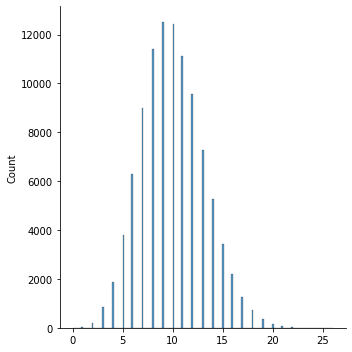

In [43]:
# Plot Distribution
plt.figure(dpi=80)

sns.displot(data)

plt.show()

### Uniform

### $P(x) = \frac{1}{b-a}$

In [48]:
# PDF in Python
def p_uni(a, b):
    return 1 / (b - a)

p_uni(10, 210)

0.005

In [49]:
# PDF in Stats
uni = st.uniform(10, 210)
uni.pdf(21)

0.004761904761904762

In [52]:
# CDF in Python
def c_uni(a, b, k):
    total = 0
    for i in range(a, k):
        total += p_uni(a, b)
    return total
c_uni(0, 10, 7)


0.7

In [17]:
# CDF in Stats
uni = st.uniform(0, 10)
uni.cdf(7)

0.7

In [53]:
# Generate Data with Stats
uni = st.uniform(-100, 100)
data = uni.rvs(size=10000)

<Figure size 480x320 with 0 Axes>

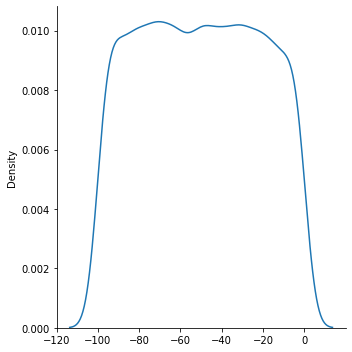

In [56]:
# Plot Distribution
plt.figure(dpi=80)

sns.displot(data, kind='kde')

plt.show()

### Normal

**Hint:** $ \rightarrow \text{erf}(z) = \frac{2}{\sqrt{\pi}} \int_{0}^{z} e^{-t^2} $

In [64]:
# PDF in Python
def p_norm(x , mean , sd):
    return 1 / (sd * math.sqrt(2 * math.pi)) * math.exp(-0.5 * ((x - mean) / sd) ** 2)
p_norm(3, 0, 1)

0.0044318484119380075

In [65]:
# PDF in Stats
norm = st.norm(loc=0, scale=1)
norm.pdf(3)

0.0044318484119380075

In [68]:
# CDF in Python
def c_norm(x , mean , sd):
    return 0.5 * (1 + math.erf((x-mean)/(sd*2**0.5)))
c_norm(0.356, 0, 1)

0.6390797174095553

In [69]:
# CDF in Stats
norm.cdf(0.356)

0.6390797174095553

In [77]:
# Generate Data with Stats
data = norm.rvs(size=100000)

<Figure size 480x320 with 0 Axes>

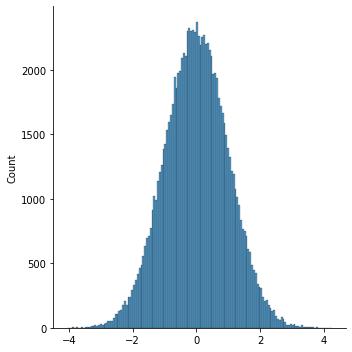

In [79]:
# Plot Distribution
plt.figure(dpi=80)

sns.displot(data)

plt.show()

In [80]:
# Problem ~ P(2 < X < 5) [mean=3, var=9]
uni = st.norm(3, np.sqrt(9))
uni.cdf(5) - uni.cdf(2)

0.3780661222713134

In [81]:
# Problem ~ CDF(?) = 0.8461
uni = st.norm(0, 1)
uni.ppf(0.8461) # PPF != CDF
uni.cdf(1.0198491688883393)

0.8460999999999999

In [82]:
# Problem ~ P(-2 < X < 1) = ?%
uni = st.norm(0, 1)
prob =  uni.cdf(1) - uni.cdf(-2)
prob * 100

81.85946141203637

### Custom Variable
`pip install pprobs`


In [83]:
from pprobs.distribution import Continuous, Discrete

In [87]:
# CDF
def pmf(x):
    return 1 / 6

dist = Discrete(pmf, [1, 2, 3, 4, 5, 6])
data = dist.generate(10000)

data.count(6), data.count(1)

(1673, 1668)

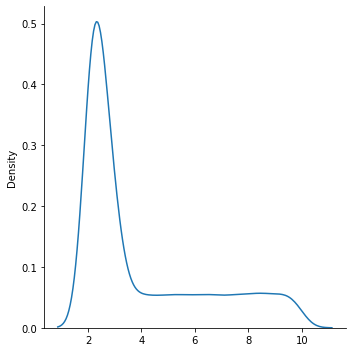

In [88]:
# PMF
def pdf(x):
    return 1 / x ** 4

dist = Continuous(pdf, [2, 10])
data = dist.generate(10000)

sns.displot(data, kind='kde')